# Simulations for determining general variance of noise across various imaging cases

In [1]:
from visibilities import *
from images import *
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers
import os
import logging, sys

cmap='turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.set_loglevel("critical")

## Load visibility layouts for long and short baseline databases, the same division is used for all three of our test cases so can use the same layout for all

In [2]:
from rascil.processing_components import create_visibility_from_ms

[vs] = create_visibility_from_ms('data3/SGRA_small_baselines.ms')
[vl] = create_visibility_from_ms('data3/SGRA_long_baselines.ms')

create_visibility_from_ms: {'type': 'Measurement Set', 'subType': 'UVFITS', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\nThis is a measurement set Table holding astronomical observations\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 183337 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-01 21:35:07.746
create_visibility_from_ms: {'type': 'Measurement Set', 'subType': 'UVFITS', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\nThis is a measurement set Table holding astronomical observations\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 76909 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_v

/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)
/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapp

## Compute visibility noise for SGRA long visibilities

In [3]:
vl, cell_size, im = visibilities_from_image(vl,'data/SGRA_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
dirty, psf = dirty_psf_from_visibilities(vl, cell_size, npix=512, weighting="uniform")

advise_wide_field: (max_wavelength) Maximum wavelength 0.300 (meters)
advise_wide_field: (min_wavelength) Minimum wavelength 0.300 (meters)
advise_wide_field: (maximum_baseline) Maximum baseline 24331.5 (wavelengths)
advise_wide_field: (maximum_w) Maximum w 10597.6 (wavelengths)
advise_wide_field: (diameter) Station/dish diameter 13.5 (meters)
advise_wide_field: (primary_beam_fov) Primary beam 0.0222 (rad) 1.27 (deg) 4.58e+03 (asec)
advise_wide_field: (image_fov) Image field of view 0.0666 (rad) 3.82 (deg) 1.37e+04 (asec)
advise_wide_field: (synthesized_beam) Synthesized beam 4.11e-05 (rad) 0.00235 (deg) 8.48 (asec)
advise_wide_field: (cellsize) Cellsize 1.03e-05 (rad) 0.000589 (deg) 2.12 (asec)
advice_wide_field: (npixels) Npixels per side = 6484
advice_wide_field: (npixels2) Npixels (power of 2) per side = 8192
advice_wide_field: (npixels23) Npixels (power of 2, 3) per side = 8192
advice_wide_field: (npixels_min) Npixels (power of 2, 3, 4, 5) per side = 6561

advice_wide_field: (w_sa

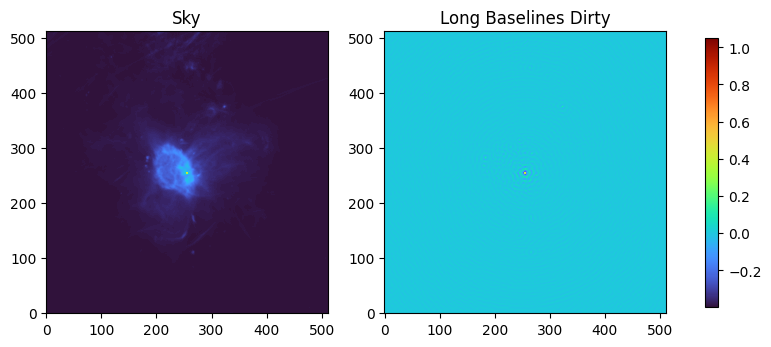

SGRA long baseline visibility noise with mean 0.0026280988534868486 and variance 9.404499932587288e-10


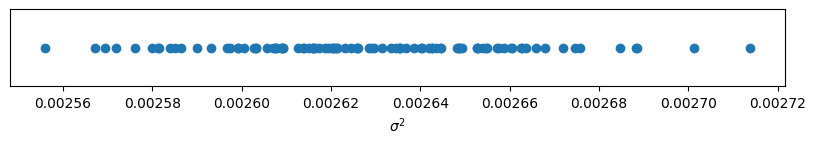

In [4]:
helpers.plotNImages([im.pixels.data, dirty.pixels.data], ["Sky", "Long Baselines Dirty"], cmap)
variances = helpers.read_csv("results/noise_results/sgra_long_variances.dat")
variances = [float(x) for x in variances]

varvar = numpy.var(variances)
varmean = numpy.mean(variances)

print("SGRA long baseline visibility noise with mean " + str(varmean) + " and variance " + str(varvar))

helpers.plot1Dscatter(variances, "$\sigma^2$")

## Compute visibility noise for SGRB long visibilities

In [5]:
vl, cell_size, im = visibilities_from_image(vl,'data/SGRB_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
dirty, psf = dirty_psf_from_visibilities(vl, cell_size, npix=512, weighting="uniform")

advise_wide_field: (max_wavelength) Maximum wavelength 0.300 (meters)
advise_wide_field: (min_wavelength) Minimum wavelength 0.300 (meters)
advise_wide_field: (maximum_baseline) Maximum baseline 24331.5 (wavelengths)
advise_wide_field: (maximum_w) Maximum w 10597.6 (wavelengths)
advise_wide_field: (diameter) Station/dish diameter 13.5 (meters)
advise_wide_field: (primary_beam_fov) Primary beam 0.0222 (rad) 1.27 (deg) 4.58e+03 (asec)
advise_wide_field: (image_fov) Image field of view 0.0666 (rad) 3.82 (deg) 1.37e+04 (asec)
advise_wide_field: (synthesized_beam) Synthesized beam 4.11e-05 (rad) 0.00235 (deg) 8.48 (asec)
advise_wide_field: (cellsize) Cellsize 1.03e-05 (rad) 0.000589 (deg) 2.12 (asec)
advice_wide_field: (npixels) Npixels per side = 6484
advice_wide_field: (npixels2) Npixels (power of 2) per side = 8192
advice_wide_field: (npixels23) Npixels (power of 2, 3) per side = 8192
advice_wide_field: (npixels_min) Npixels (power of 2, 3, 4, 5) per side = 6561

advice_wide_field: (w_sa

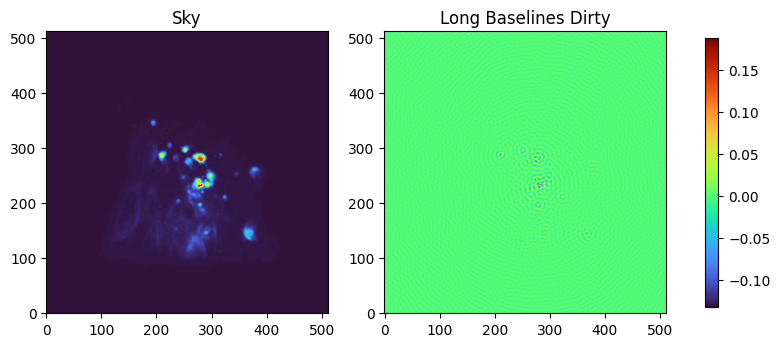

SGRA long baseline visibility noise with mean 0.0026280988534868486 and variance 9.404499932587288e-10


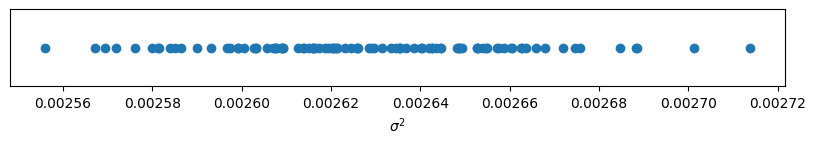

In [6]:
helpers.plotNImages([im.pixels.data, dirty.pixels.data], ["Sky", "Long Baselines Dirty"], cmap)
variances = helpers.read_csv("results/noise_results/sgra_long_variances.dat")
variances = [float(x) for x in variances]

varvar = numpy.var(variances)
varmean = numpy.mean(variances)

print("SGRA long baseline visibility noise with mean " + str(varmean) + " and variance " + str(varvar))

helpers.plot1Dscatter(variances, "$\sigma^2$")

## Compute visibility noise for SGRC long visibilities

In [7]:
vl, cell_size, im = visibilities_from_image(vl,'data/SGRC_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
dirty, psf = dirty_psf_from_visibilities(vl, cell_size, npix=512, weighting="uniform")

advise_wide_field: (max_wavelength) Maximum wavelength 0.300 (meters)
advise_wide_field: (min_wavelength) Minimum wavelength 0.300 (meters)
advise_wide_field: (maximum_baseline) Maximum baseline 24331.5 (wavelengths)
advise_wide_field: (maximum_w) Maximum w 10597.6 (wavelengths)
advise_wide_field: (diameter) Station/dish diameter 13.5 (meters)
advise_wide_field: (primary_beam_fov) Primary beam 0.0222 (rad) 1.27 (deg) 4.58e+03 (asec)
advise_wide_field: (image_fov) Image field of view 0.0666 (rad) 3.82 (deg) 1.37e+04 (asec)
advise_wide_field: (synthesized_beam) Synthesized beam 4.11e-05 (rad) 0.00235 (deg) 8.48 (asec)
advise_wide_field: (cellsize) Cellsize 1.03e-05 (rad) 0.000589 (deg) 2.12 (asec)
advice_wide_field: (npixels) Npixels per side = 6484
advice_wide_field: (npixels2) Npixels (power of 2) per side = 8192
advice_wide_field: (npixels23) Npixels (power of 2, 3) per side = 8192
advice_wide_field: (npixels_min) Npixels (power of 2, 3, 4, 5) per side = 6561

advice_wide_field: (w_sa

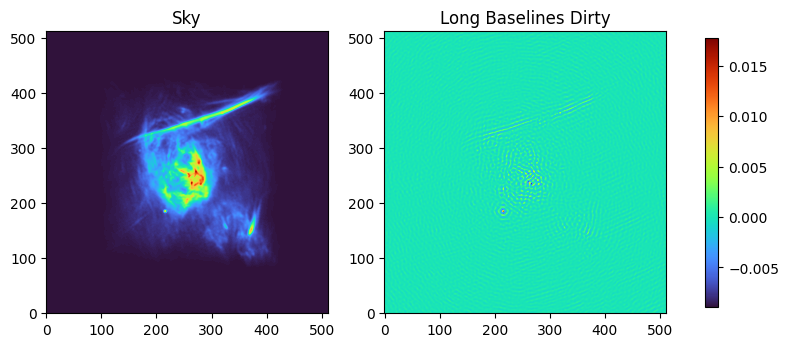

SGRC long baseline visibility noise with mean 2.736295975441754e-05 and variance 1.1842462540117975e-13


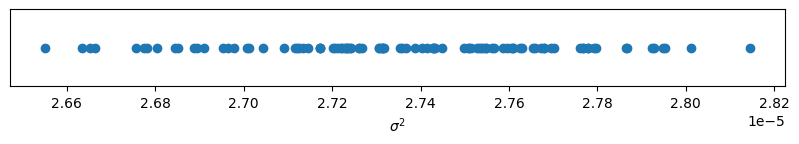

In [8]:
helpers.plotNImages([im.pixels.data, dirty.pixels.data], ["Sky", "Long Baselines Dirty"], cmap)
variances = helpers.read_csv("results/noise_results/sgrc_long_variances.dat")
variances = [float(x) for x in variances]

varvar = numpy.var(variances)
varmean = numpy.mean(variances)

print("SGRC long baseline visibility noise with mean " + str(varmean) + " and variance " + str(varvar))

helpers.plot1Dscatter(variances, "$\sigma^2$")

## Compute reconstruction noise for SGRA short visibilities

## 